# Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.display import display

# Data

In [2]:
customers = pd.read_csv('customers-segmented.csv').set_index('ID')
purchases = pd.read_csv('purchases.csv')

cluster_names = ['Average', 'Below average careers', 'Above average careers', 'Old successful men']

In [3]:
df_raw = purchases.merge(customers, left_on='Customer ID', right_index=True).rename(columns={'Customer ID':'Customer_ID'})

In [4]:
df = df_raw.copy()
df = df.join(pd.get_dummies(df['Brand'], prefix='Brand', prefix_sep='_').astype(int))

In [5]:
for brand in [1, 2, 3, 4, 5]:
    temp = df[df['Brand'] == brand]
    temp = temp.assign(**{f'Revenue_Brand_{brand}': temp[f'Price_{brand}'] * temp['Quantity']})
    col = f'Revenue_Brand_{brand}'
    temp = temp[[col]]
    df = df.merge(temp, left_index=True, right_index=True, how='outer')
    df[col] = df[col].fillna(0)

df['Total_Revenue'] = (df['Revenue_Brand_1']+df['Revenue_Brand_2']+df['Revenue_Brand_3']+df['Revenue_Brand_4']+df['Revenue_Brand_5'])

In [6]:
df = df[['ID', 'Day', 'Customer_ID', 'Cluster', 'Incidence', 'Quantity',
         'Brand', 'Brand_0', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5',
         'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5',
         'Revenue_Brand_1', 'Revenue_Brand_2', 'Revenue_Brand_3', 'Revenue_Brand_4', 'Revenue_Brand_5', 'Total_Revenue']]

In [41]:
display(df)
display(df.describe().round(0))

,ID,Day,Customer_ID,Cluster,Incidence,Quantity,Brand,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Revenue
0,200000001,1,100000636,1,0,0,0,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
1,200000002,11,100000636,1,0,0,0,1,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
2,200000003,12,100000636,1,0,0,0,1,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
3,200000004,16,100000636,1,0,0,0,1,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
4,200000005,18,100000636,1,0,0,0,1,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200058689,703,100001638,1,0,0,0,1,0,0,0,0,0,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0.0,0.00,0.0,0.0,0.0,0.00
58689,200058690,710,100001638,1,0,0,0,1,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
58690,200058691,717,100001638,1,0,0,0,1,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.00
58691,200058692,722,100001638,1,1,3,2,0,0,1,0,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0.0,5.46,0.0,0.0,0.0,5.46


,ID,Day,Customer_ID,Cluster,Incidence,Quantity,Brand,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Revenue
count,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0,58693.0
mean,200029347.0,349.0,100001063.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
std,16943.0,212.0,583.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0
min,200000001.0,1.0,100000001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,200014674.0,161.0,100000555.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,200029347.0,343.0,100001058.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,200044020.0,530.0,100001591.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,200058693.0,730.0,100001996.0,4.0,1.0,15.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,19.0,25.0,28.0,28.0,40.0,40.0


# Customer analysis

In [8]:
df_customers = df[['Customer_ID','Cluster']].groupby('Customer_ID').mean().astype(int)
df_visits = df[['Customer_ID','Incidence']].groupby('Customer_ID').count().rename(columns={'Incidence':'Store_Visits'})
df_pinstances = df[['Customer_ID','Incidence']].groupby('Customer_ID').sum().rename(columns={'Incidence':'Purchase_Instances'})
df_pcount = df[['Customer_ID','Quantity']].groupby('Customer_ID').sum().rename(columns={'Quantity':'Purchases_Count'})
df_trevenue = df[['Customer_ID','Total_Revenue']].groupby('Customer_ID').sum()
df_customer_habits = df_customers.merge(df_visits, left_on='Customer_ID', right_on='Customer_ID')
df_customer_habits = df_customer_habits.merge(df_pinstances, left_on='Customer_ID', right_on='Customer_ID')
df_customer_habits = df_customer_habits.merge(df_pcount, left_on='Customer_ID', right_on='Customer_ID')
df_customer_habits = df_customer_habits.merge(df_trevenue, left_on='Customer_ID', right_on='Customer_ID')
df_customer_habits['Conversion_Rate'] = round(df_customer_habits['Purchase_Instances'] / df_customer_habits['Store_Visits'],2)
df_customer_habits['Visit_Yield'] = round(df_customer_habits['Purchases_Count'] / df_customer_habits['Store_Visits'],2)
df_customer_habits['Basket_Size'] = round(df_customer_habits['Purchases_Count'] / df_customer_habits['Purchase_Instances'],2)
df_customer_habits.sort_values('Total_Revenue', ascending=False)

,Cluster,Store_Visits,Purchase_Instances,Purchases_Count,Total_Revenue,Conversion_Rate,Visit_Yield,Basket_Size
Customer_ID,,,,,,,,
100001218,1,358,327,702,1859.20,0.91,1.96,2.15
100001255,3,347,320,676,1786.48,0.92,1.95,2.11
100000185,1,353,322,674,1781.05,0.91,1.91,2.09
100000397,3,100,67,536,1336.85,0.67,5.36,8.00
100000914,3,99,65,519,1297.85,0.66,5.24,7.98
...,...,...,...,...,...,...,...,...
100000977,3,111,7,10,24.99,0.06,0.09,1.43
100001399,1,102,8,14,24.81,0.08,0.14,1.75
100000036,1,102,7,13,22.55,0.07,0.13,1.86


In [9]:
df_customer_habits.describe().round(2)

,Cluster,Store_Visits,Purchase_Instances,Purchases_Count,Total_Revenue,Conversion_Rate,Visit_Yield,Basket_Size
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,1.95,117.39,29.28,81.23,165.51,0.24,0.68,2.78
std,0.94,26.68,30.67,83.88,204.89,0.16,0.60,1.02
min,1.00,72.00,6.00,10.00,17.75,0.05,0.09,1.13
25%,1.00,103.00,15.00,36.00,66.38,0.13,0.32,2.12
50%,2.00,114.00,21.00,58.00,107.60,0.18,0.54,2.63
75%,3.00,125.00,34.00,93.00,181.54,0.31,0.82,3.22
max,4.00,358.00,327.00,702.00,1859.20,0.92,5.36,8.00


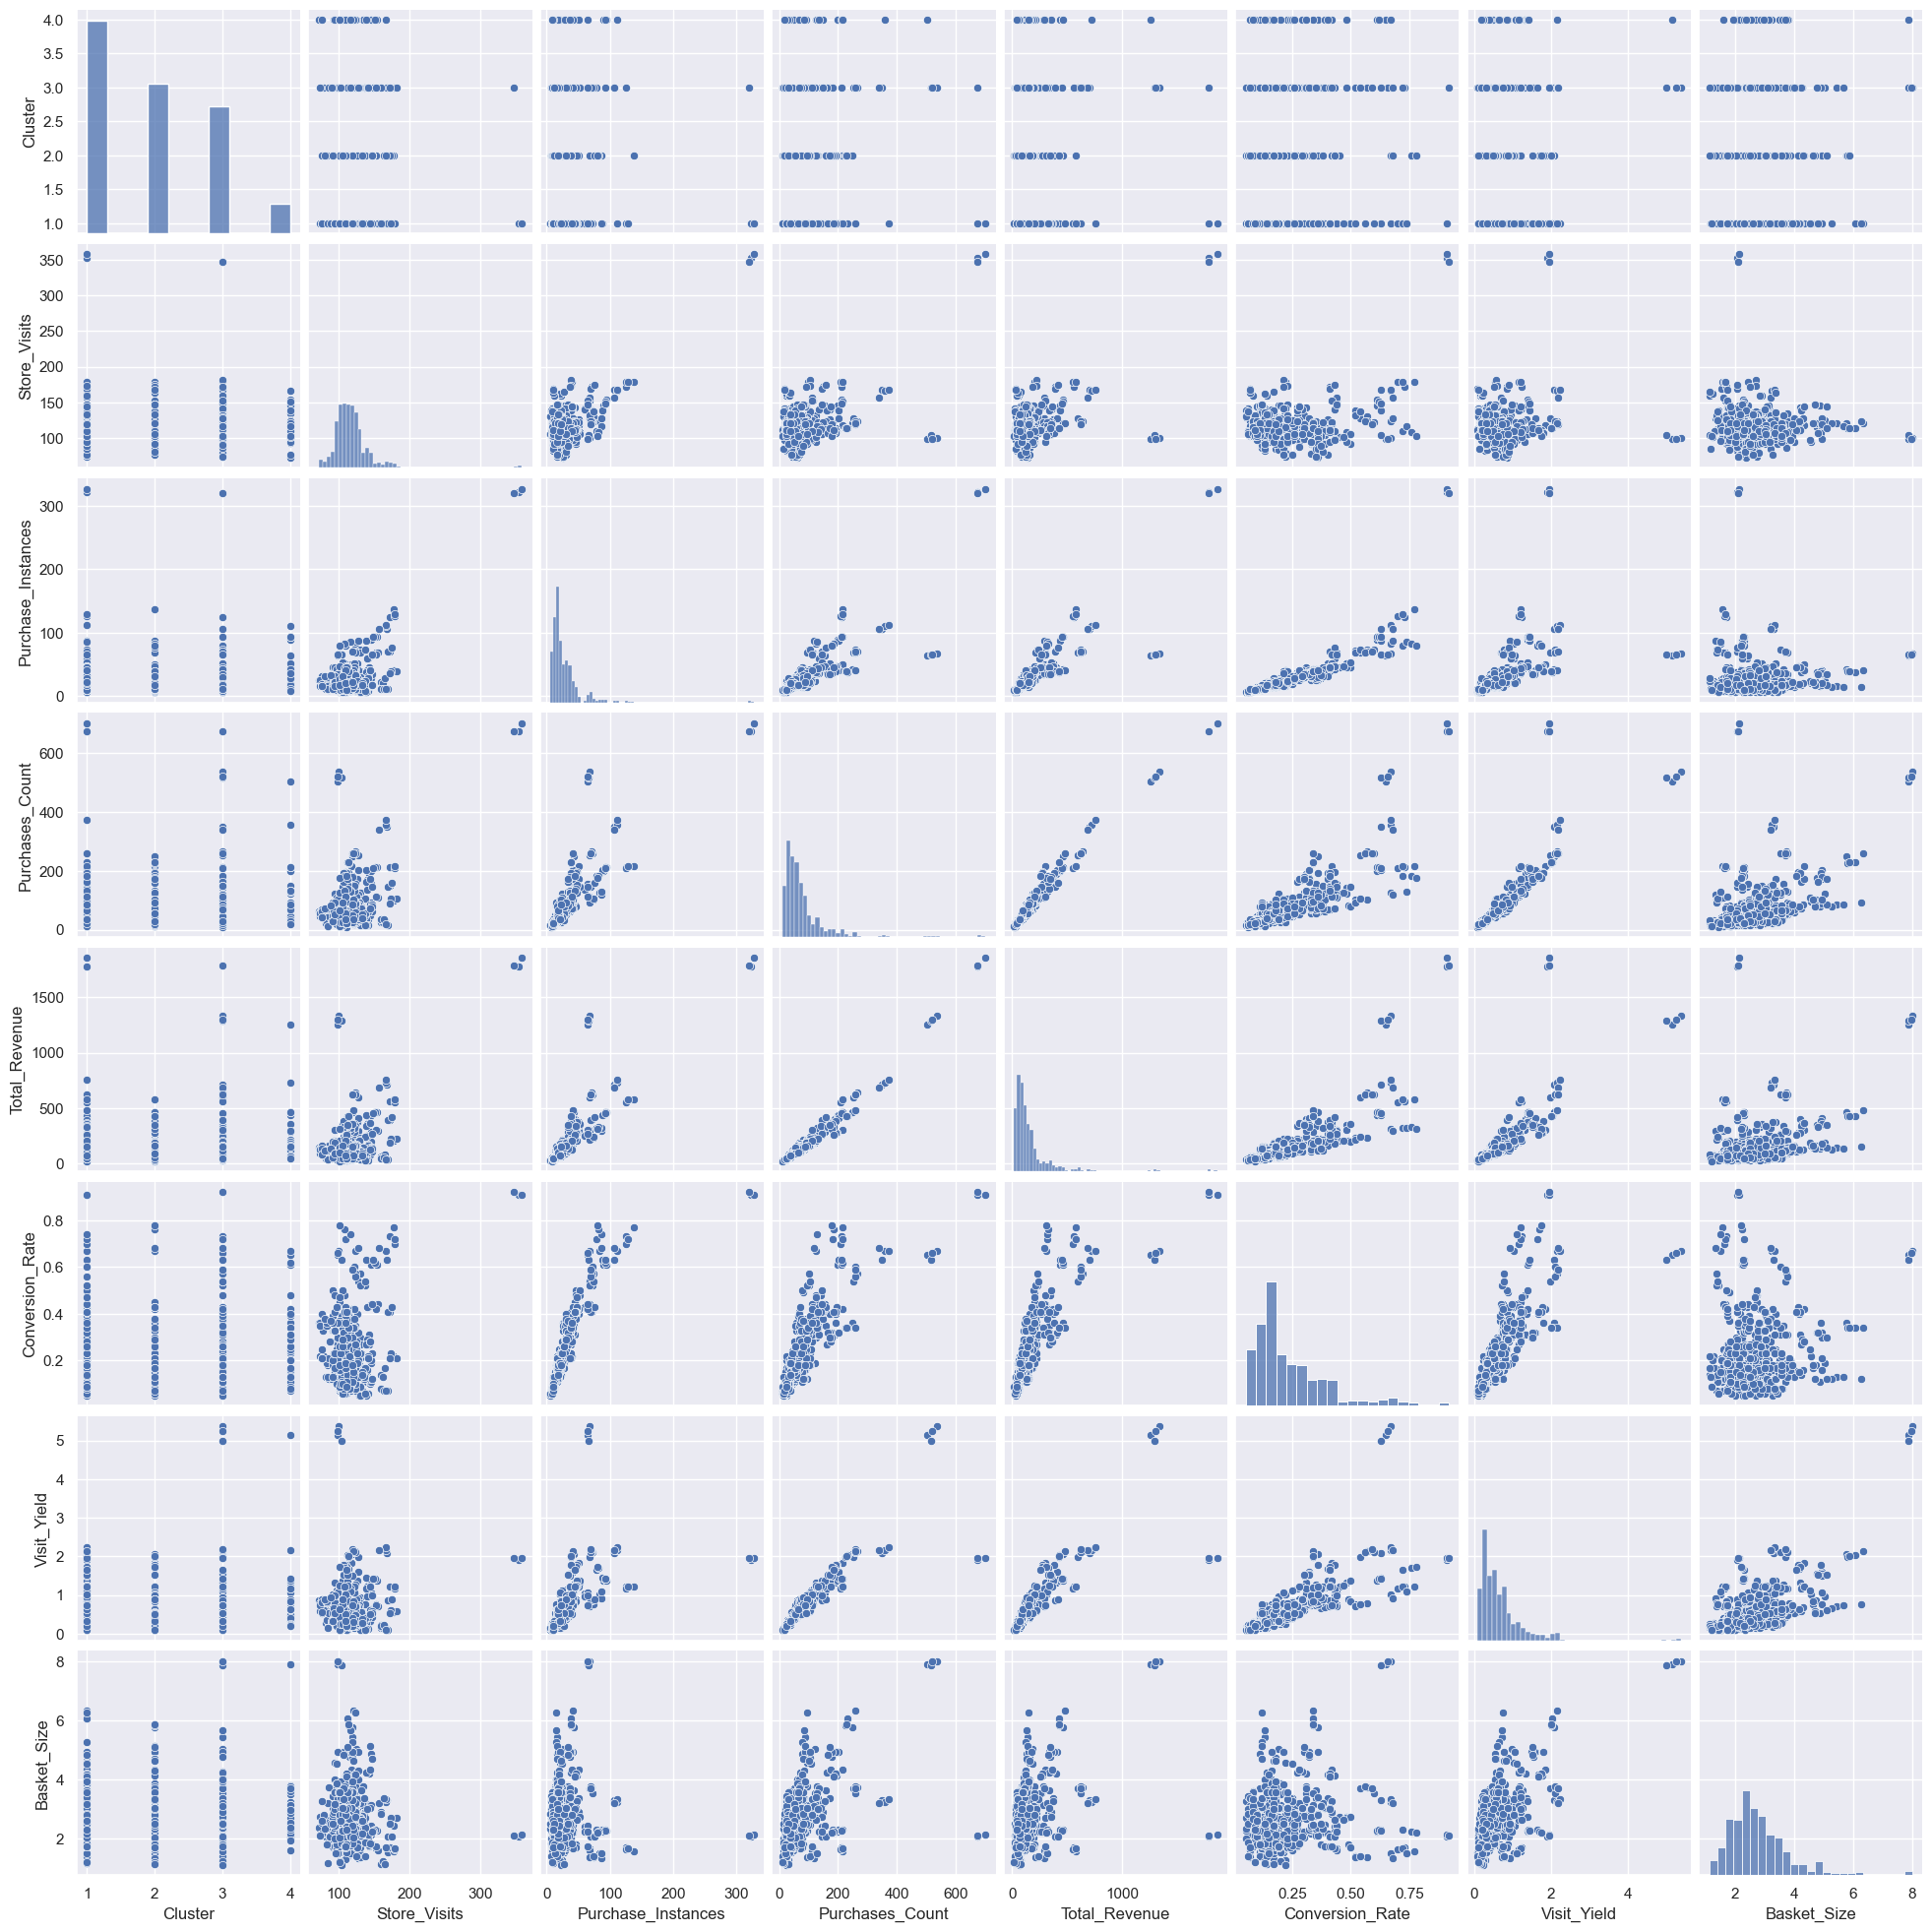

In [10]:
sns.pairplot(df_customer_habits)

<Axes: >

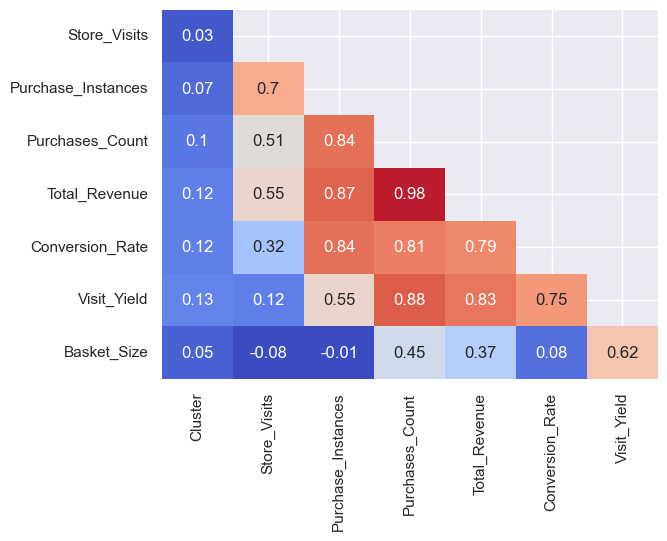

In [11]:
corr = df_customer_habits.corr().round(2)
sns.heatmap(corr.iloc[1:,:-1], mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1], annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar=None)

In [12]:
df_customer_habits.sort_values('Basket_Size', ascending=False)

,Cluster,Store_Visits,Purchase_Instances,Purchases_Count,Total_Revenue,Conversion_Rate,Visit_Yield,Basket_Size
Customer_ID,,,,,,,,
100000397,3,100,67,536,1336.85,0.67,5.36,8.00
100000914,3,99,65,519,1297.85,0.66,5.24,7.98
100000497,4,98,64,504,1253.77,0.65,5.14,7.88
100000625,3,104,66,518,1288.34,0.63,4.98,7.85
100001567,1,121,41,260,480.31,0.34,2.15,6.34
...,...,...,...,...,...,...,...,...
100000865,2,103,9,11,18.03,0.09,0.11,1.22
100001692,1,85,11,13,32.96,0.13,0.15,1.18
100000358,3,159,22,25,64.32,0.14,0.16,1.14


In [13]:
df_raw[df_raw['Customer_ID'].isin([100001218,100000185,100001255])].groupby('Customer_ID')[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']].mean().astype(int)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Customer_ID,,,,,,,
100000185,0,0,36,1,106205,1,1
100001218,0,0,37,1,124597,1,2
100001255,0,0,53,1,158193,1,1


In [14]:
df[df['Customer_ID'].isin([100001218,100000185,100001255])].groupby('Customer_ID')[['Brand']].mean().round(2)

,Brand
Customer_ID,
100000185,4.55
100001218,4.56
100001255,4.60


In [15]:
df[df['Customer_ID'].isin([100001218,100000185,100001255])][['Customer_ID','Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']].groupby('Customer_ID').mean().round(3)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Customer_ID,,,,,
100000185,0.0,0.003,0.0,0.0,0.909
100001218,0.0,0.003,0.0,0.0,0.911
100001255,0.0,0.003,0.0,0.0,0.919


In [16]:
df_raw[df_raw['Customer_ID'].isin([100000397,100000914,100000497,100000625])].groupby('Customer_ID')[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']].mean().astype(int)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Customer_ID,,,,,,,
100000397,1,1,55,2,165717,2,2
100000497,0,0,29,0,222360,2,2
100000625,0,0,65,2,136812,1,1
100000914,0,1,28,1,146463,1,2


In [17]:
df[df['Customer_ID'].isin([100000397,100000914,100000497,100000625])].groupby('Customer_ID')[['Brand']].mean().round(2)

,Brand
Customer_ID,
100000397,3.12
100000497,3.03
100000625,2.95
100000914,3.05


In [18]:
df[df['Customer_ID'].isin([100000397,100000914,100000497,100000625])][['Customer_ID','Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']].groupby('Customer_ID').mean().round(3)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Customer_ID,,,,,
100000397,0.0,0.0,0.030,0.170,0.470
100000497,0.0,0.0,0.031,0.173,0.449
100000625,0.0,0.0,0.029,0.163,0.442
100000914,0.0,0.0,0.030,0.172,0.455


C:\Users\jgibb\AppData\Local\Temp\ipykernel_32276\4252817079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_brandvincome.index, y=df_brandvincome['Income'], errorbar=None, palette="Set1")


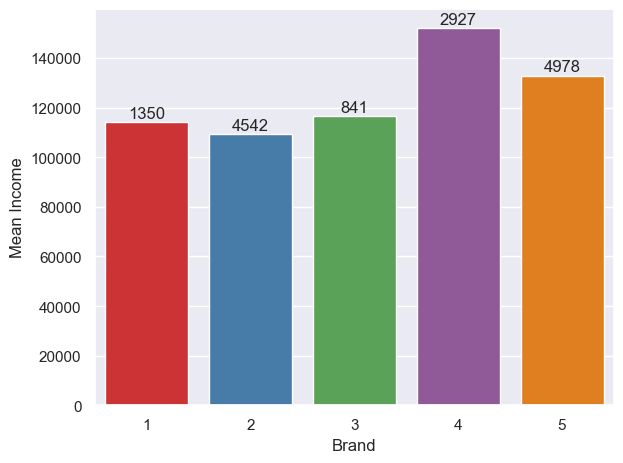

In [19]:
df_counts = df_raw[df_raw['Incidence']==1][['Brand','Customer_ID']].groupby('Brand').count().rename(columns={'Customer_ID':'Count of Customers'})
df_brandvincome = df_raw[df_raw['Incidence']==1][['Brand','Income']].groupby('Brand').mean().round(2)
sns.barplot(x=df_brandvincome.index, y=df_brandvincome['Income'], errorbar=None, palette="Set1")
for i, (income, count) in enumerate(zip(df_brandvincome['Income'], df_counts['Count of Customers'])):
    plt.text(i, income + 500, f'{count}', ha='center', va='bottom')
plt.ylabel('Mean Income')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

# Cluster analysis

In [20]:
df_cluster_customer_counts = df[['Cluster','Customer_ID']].groupby('Cluster').nunique().rename(columns={'Customer_ID':'# Customers'})
df_cluster_customer_counts['% Customers'] = df_cluster_customer_counts / df_cluster_customer_counts.sum()
df_cluster_habits = df_customer_habits[['Cluster','Store_Visits','Purchase_Instances','Purchases_Count']].groupby('Cluster').sum().rename(columns={'Store_Visits':'Store_Visits (total)','Purchase_Instances':'Purchase_Instances (total)','Purchases_Count':'Purchases_Count (total)'})
df_cluster_habits = df_cluster_customer_counts.merge(df_cluster_habits, left_index=True, right_index=True)

df_cluster_habits_mean = df_customer_habits.groupby('Cluster').mean().add_suffix(' (mean)')
df_cluster_habits = df_cluster_habits.merge(df_cluster_habits_mean, left_index=True, right_index=True)

df_cluster_habits = df_cluster_habits[['# Customers','% Customers','Store_Visits (total)','Store_Visits (mean)','Purchase_Instances (total)','Purchase_Instances (mean)','Purchases_Count (total)','Purchases_Count (mean)','Conversion_Rate (mean)','Visit_Yield (mean)','Basket_Size (mean)']]
# df_cluster_habits = df_cluster_habits[['# Customers','% Customers','Store_Visits (total)','Store_Visits (mean)','Store_Visits (std)','Purchase_Instances (total)','Purchase_Instances (mean)','Purchase_Instances (std)','Purchases_Count (total)','Purchases_Count (mean)','Purchases_Count (std)','Conversion_Rate (mean)','Conversion_Rate (std)','Visit_Yield (mean)','Visit_Yield (std)','Basket_Size (mean)','Basket_Size (std)']]

df_cluster_habits.index = cluster_names
# df_cluster_habits.index = [1,2,3,4]

df_cluster_habits.round(2).T

,Average,Below average careers,Above average careers,Old successful men
# Customers,205.00,144.00,122.00,29.00
% Customers,0.41,0.29,0.24,0.06
Store_Visits (total),24065.00,16592.00,14625.00,3411.00
Store_Visits (mean),117.39,115.22,119.88,117.62
Purchase_Instances (total),5995.00,3485.00,4072.00,1086.00
Purchase_Instances (mean),29.24,24.20,33.38,37.45
Purchases_Count (total),16059.00,9745.00,11521.00,3289.00
Purchases_Count (mean),78.34,67.67,94.43,113.41
Conversion_Rate (mean),0.23,0.21,0.26,0.31
Visit_Yield (mean),0.63,0.60,0.77,0.96


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Average'),
  Text(1.5, 0, 'Below average careers'),
  Text(2.5, 0, 'Above average careers'),
  Text(3.5, 0, 'Old successful men')])

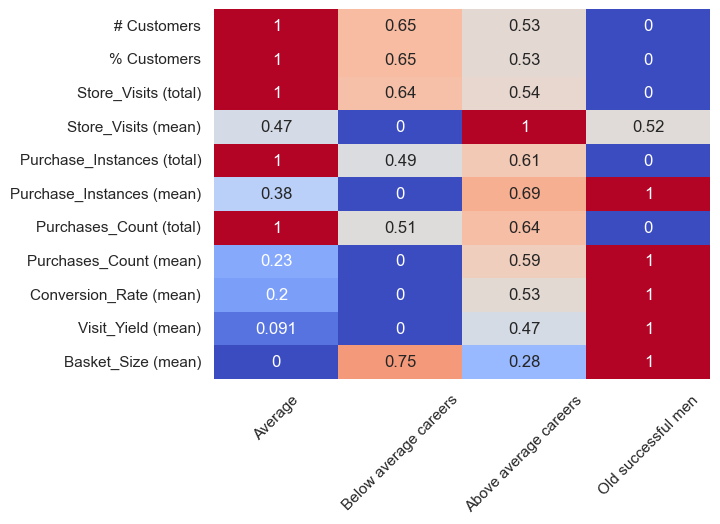

In [65]:
scaler = MinMaxScaler()
df_cluster_habits_scaled = scaler.fit_transform(df_cluster_habits)
sns.heatmap(pd.DataFrame(df_cluster_habits_scaled.T, columns=df_cluster_habits.T.columns), xticklabels=cluster_names, yticklabels=df_cluster_habits.columns, annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=1)
plt.xticks(rotation=45)

In [22]:
df_cluster_habits_std = df_customer_habits.groupby('Cluster').std().add_suffix(' (std)')
df_cluster_habits.index = [1,2,3,4]
df_cluster_habits_std = df_cluster_habits.merge(df_cluster_habits_std, left_index=True, right_index=True)

# df_cluster_habits = df_cluster_habits[['# Customers','% Customers','Store_Visits (total)','Store_Visits (mean)','Store_Visits (std)','Purchase_Instances (total)','Purchase_Instances (mean)','Purchase_Instances (std)','Purchases_Count (total)','Purchases_Count (mean)','Purchases_Count (std)','Conversion_Rate (mean)','Conversion_Rate (std)','Visit_Yield (mean)','Visit_Yield (std)','Basket_Size (mean)','Basket_Size (std)']]

df_cluster_habits_std.index = cluster_names

Text(0, 0.5, 'Average Store Visits')

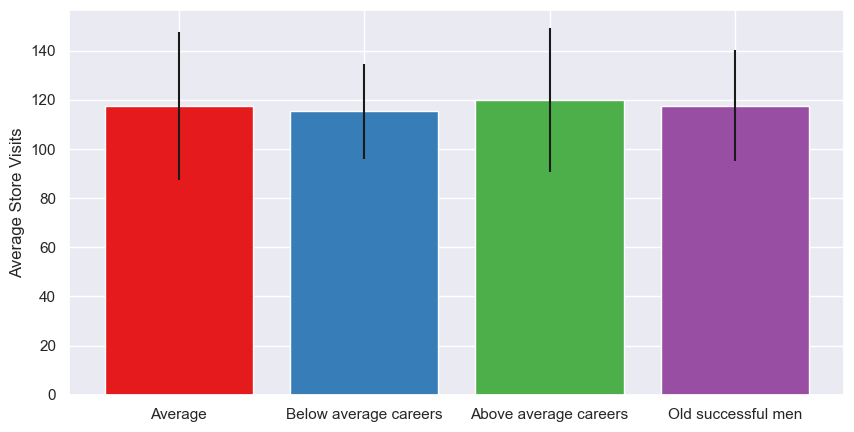

In [67]:
plt.figure(figsize=(10,5))
plt.bar(x=df_cluster_habits_std.index, height=df_cluster_habits_std['Store_Visits (mean)'], yerr=df_cluster_habits_std['Store_Visits (std)'], color=sns.color_palette("Set1"))
plt.ylabel('Average Store Visits')

Text(0, 0.5, 'Average Purchase Instances')

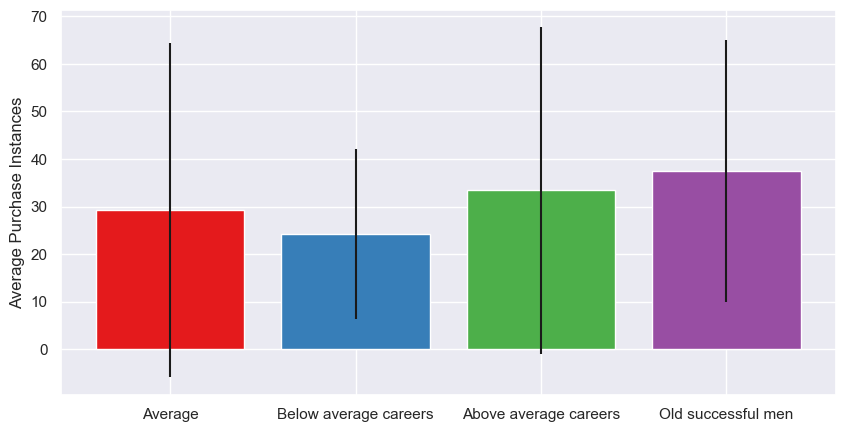

In [60]:
plt.figure(figsize=(10,5))
plt.bar(x=df_cluster_habits_std.index, height=df_cluster_habits_std['Purchase_Instances (mean)'], yerr=df_cluster_habits_std['Purchase_Instances (std)'], color=sns.color_palette("Set1"))
plt.ylabel('Average Purchase Instances')

Text(0, 0.5, 'Average Purchases Count')

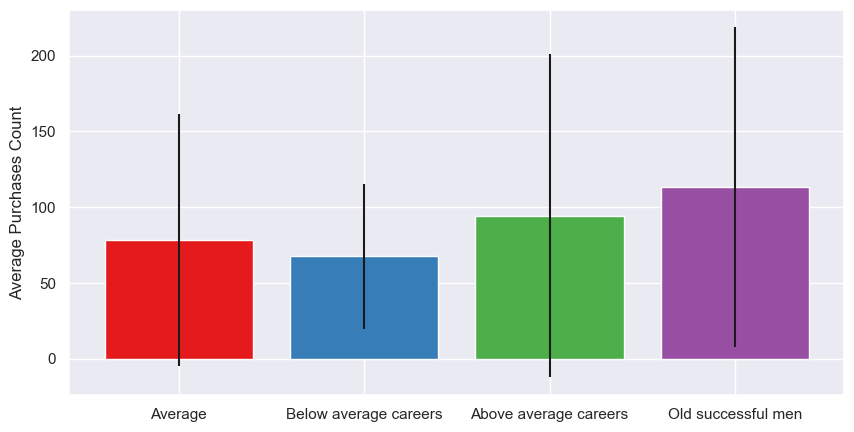

In [61]:
plt.figure(figsize=(10,5))
plt.bar(x=df_cluster_habits_std.index, height=df_cluster_habits_std['Purchases_Count (mean)'], yerr=df_cluster_habits_std['Purchases_Count (std)'], color=sns.color_palette("Set1"))
plt.ylabel('Average Purchases Count')

<Axes: >

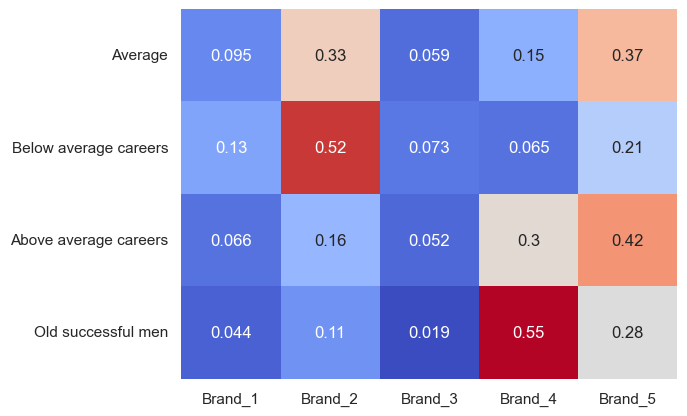

In [26]:
df_cluster_brandpreference = df[df['Incidence']==1].groupby('Cluster')[['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']].mean().round(3)
df_cluster_brandpreference.index = cluster_names
sns.heatmap(df_cluster_brandpreference, annot=True, cmap='coolwarm', cbar=False)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Revenue_Brand_1'),
  Text(1.5, 0, 'Revenue_Brand_2'),
  Text(2.5, 0, 'Revenue_Brand_3'),
  Text(3.5, 0, 'Revenue_Brand_4'),
  Text(4.5, 0, 'Revenue_Brand_5')])

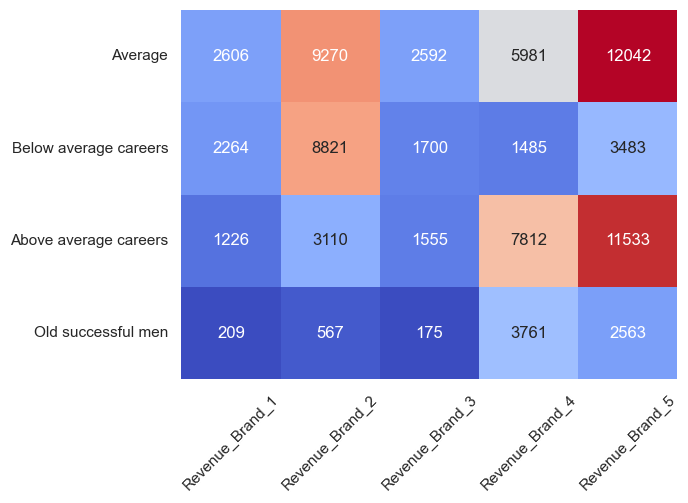

In [68]:
df_cluster_brandrevenue = df[df['Incidence']==1].groupby('Cluster')[['Revenue_Brand_1','Revenue_Brand_2','Revenue_Brand_3','Revenue_Brand_4','Revenue_Brand_5']].sum().round(0)
df_cluster_brandrevenue.index = cluster_names
sns.heatmap(df_cluster_brandrevenue, annot=True, fmt='.0f', cmap='coolwarm', cbar=False)
plt.xticks(rotation=45)

C:\Users\jgibb\AppData\Local\Temp\ipykernel_32276\936734545.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_revenue_by_brand.index, y=df_revenue_by_brand['Total Revenue'], palette="Set1")


<Axes: xlabel='Brand', ylabel='Total Revenue'>

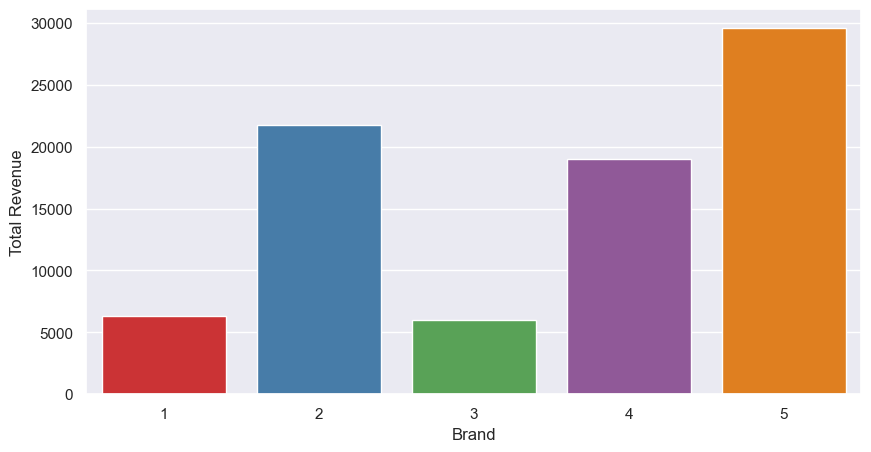

In [70]:
df_revenue_by_brand = pd.DataFrame(df_cluster_brandrevenue.sum()).rename(columns={0:'Total Revenue'})
df_revenue_by_brand.index = df_revenue_by_brand.index.str.replace('Revenue_Brand_', '', regex=False)
df_revenue_by_brand.index.name = 'Brand'
plt.figure(figsize=(10,5))
sns.barplot(x=df_revenue_by_brand.index, y=df_revenue_by_brand['Total Revenue'], palette="Set1")

C:\Users\jgibb\AppData\Local\Temp\ipykernel_32276\3890903666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_revenue_by_cluster.index, y=df_revenue_by_cluster['Total Revenue'], errorbar=None, palette="Set1")


Text(0.5, 0, '')

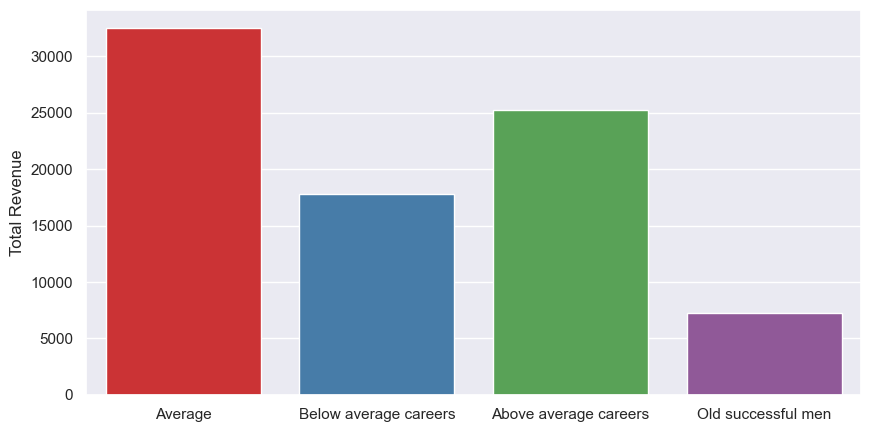

In [63]:
df_revenue_by_cluster = df[df['Incidence']==1].groupby('Cluster')[['Total_Revenue']].sum().astype(int).rename(columns={'Total_Revenue':'Total Revenue'})
df_revenue_by_cluster = df_revenue_by_cluster.merge(df_cluster_habits[['# Customers','% Customers']], left_index=True, right_index=True)
df_revenue_by_cluster['% Customers'] = df_revenue_by_cluster['% Customers']*100
df_revenue_by_cluster['Average Revenue per Customer'] = df_revenue_by_cluster['Total Revenue'] / (df_revenue_by_cluster['# Customers'])
df_revenue_by_cluster.index = cluster_names

plt.figure(figsize=(10,5))
sns.barplot(x=df_revenue_by_cluster.index, y=df_revenue_by_cluster['Total Revenue'], palette="Set1")
plt.xlabel('')

In [30]:
df_revenue_by_cluster.round(0)

,Total Revenue,# Customers,% Customers,Average Revenue per Customer
Average,32490,205,41.0,158.0
Below average careers,17753,144,29.0,123.0
Above average careers,25237,122,24.0,207.0
Old successful men,7275,29,6.0,251.0


C:\Users\jgibb\AppData\Local\Temp\ipykernel_32276\2921097918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_revenue_by_cluster.index, y=df_revenue_by_cluster['Average Revenue per Customer'], palette="Set1")


Text(0.5, 0, '')

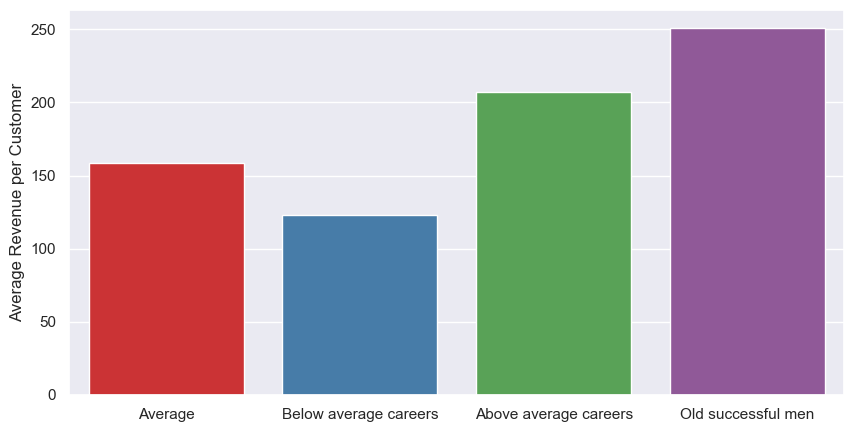

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_revenue_by_cluster.index, y=df_revenue_by_cluster['Average Revenue per Customer'], palette="Set1")
plt.xlabel('')

# Temporal analysis

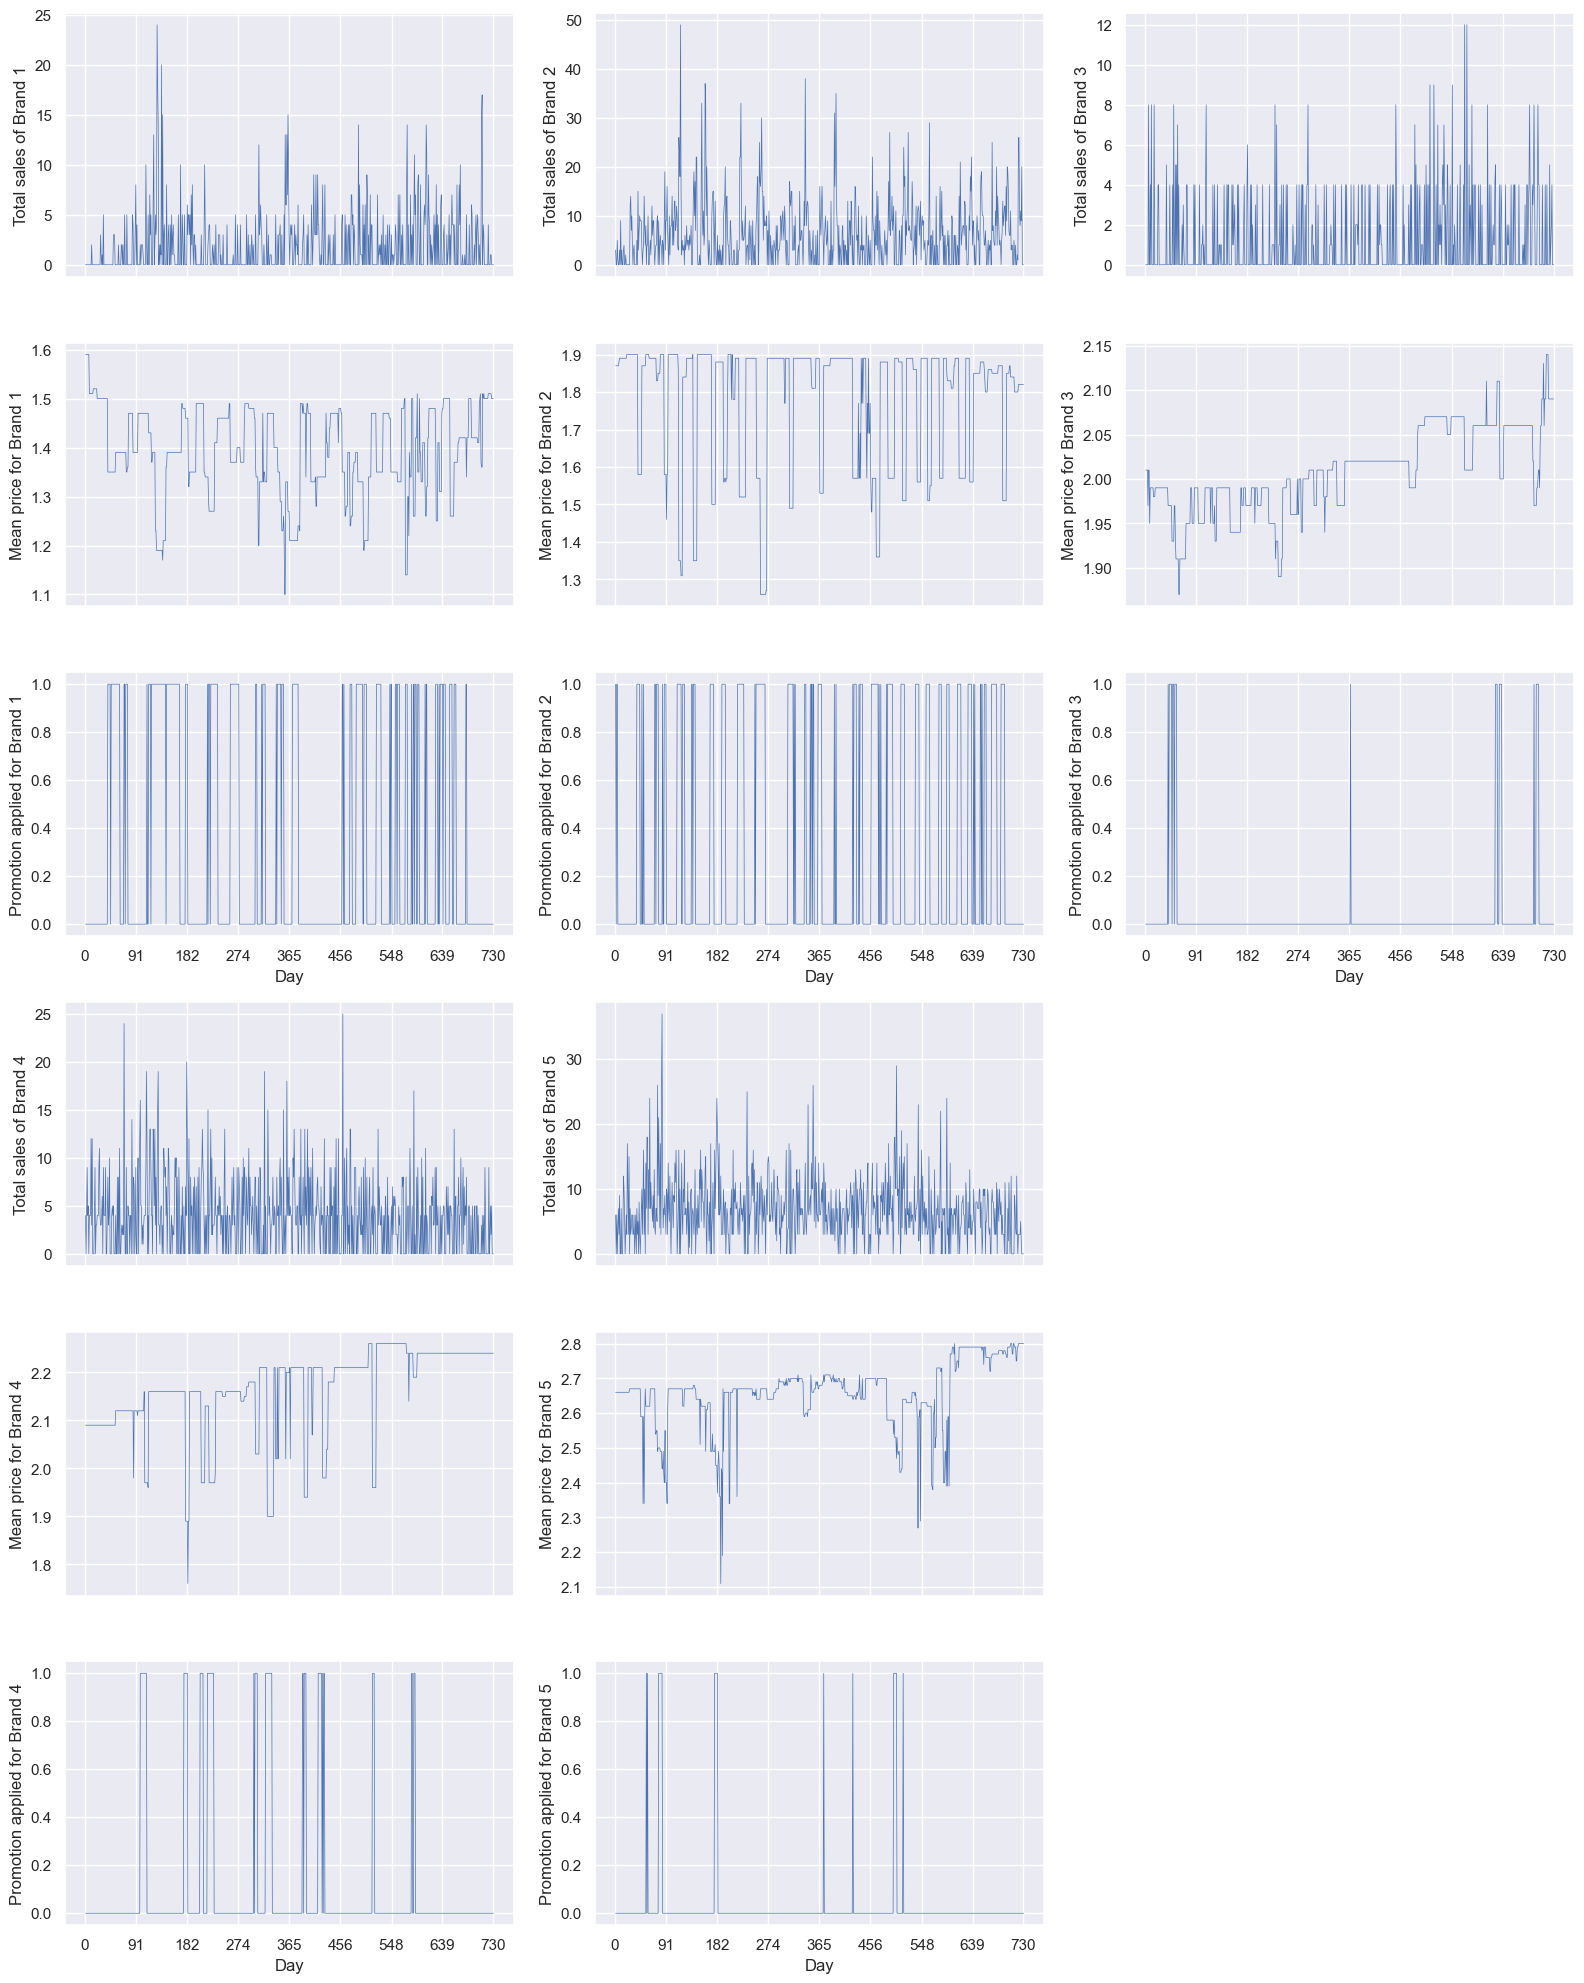

In [31]:
df_byday_sum = df.groupby('Day').sum().drop(['ID','Customer_ID'], axis=1).round(2).copy()
df_byday_mean = df.groupby('Day').mean().drop(['ID','Customer_ID'], axis=1).round(2).copy()

plt.figure(figsize=(16,4))
for i, col in enumerate(['Incidence','Quantity']):
    plt.subplot(1,2,i+1)
    sns.lineplot(df_byday_sum, x=df_byday_sum.index, y=col, linewidth=0.5)
    plt.xticks(np.arange(0,731,365/4).round(0))
    plt.xlabel('Day')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

byday_columns = ['Brand_1', 'Brand_2', 'Brand_3', 'Price_1', 'Price_2', 'Price_3', 'Promotion_1', 'Promotion_2', 'Promotion_3', 
                 'Brand_4', 'Brand_5', 'Price_4', 'Price_5', 'Promotion_4', 'Promotion_5']

byday_ylabels = {
    'Brand_1': 'Total sales of Brand 1',
    'Brand_2': 'Total sales of Brand 2',
    'Brand_3': 'Total sales of Brand 3',
    'Brand_4': 'Total sales of Brand 4',
    'Brand_5': 'Total sales of Brand 5',
    'Price_1': 'Mean price for Brand 1',
    'Price_2': 'Mean price for Brand 2',
    'Price_3': 'Mean price for Brand 3',
    'Price_4': 'Mean price for Brand 4',
    'Price_5': 'Mean price for Brand 5',
    'Promotion_1': 'Promotion applied for Brand 1',
    'Promotion_2': 'Promotion applied for Brand 2',
    'Promotion_3': 'Promotion applied for Brand 3',
    'Promotion_4': 'Promotion applied for Brand 4',
    'Promotion_5': 'Promotion applied for Brand 5'
}

fig, axes = plt.subplots(6,3, figsize=(16,20))
axes = axes.flatten()
plot_idx = 0
for i, col in enumerate(byday_columns):
    if plot_idx in [11,14,17]:
        plot_idx += 1
    ax = axes[plot_idx]
    plot_idx += 1
    d = df_byday_sum if 'Brand' in col else df_byday_mean
    sns.lineplot(data=d, x=d.index, y=col, linewidth=0.5, ax=ax)
    ax.set_ylabel(byday_ylabels[col])
    ax.set_xticks(np.arange(0, 731, 365 / 4).round(0))
    if plot_idx in [7,8,9,16,17]:
        ax.set_xlabel('Day')
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])
for ax in axes[[11,14,17]]:
    ax.axis('off')
plt.tight_layout()
plt.show()

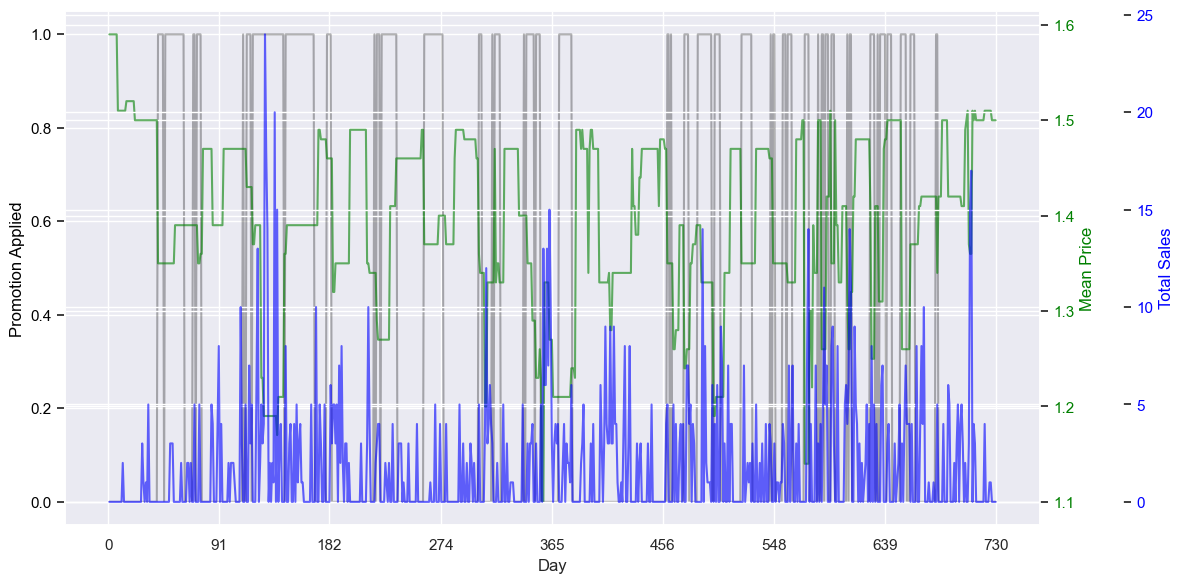

In [32]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xticks(np.arange(0, 731, 365 / 4).round(0))
sns.lineplot(data=df_byday_mean, x=df_byday_mean.index, y=df_byday_mean['Promotion_1'], ax=ax1, color='black', alpha=0.3)
ax1.set_ylabel('Promotion Applied', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
sns.lineplot(data=df_byday_mean, x=df_byday_mean.index, y=df_byday_mean['Price_1'], ax=ax2, color='green', alpha=0.6)
ax2.set_ylabel('Mean Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(data=df_byday_sum, x=df_byday_sum.index, y=df_byday_sum['Brand_1'], ax=ax3, color='blue', alpha=0.6)
ax3.set_ylabel('Total Sales', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

plt.tight_layout()
plt.show()

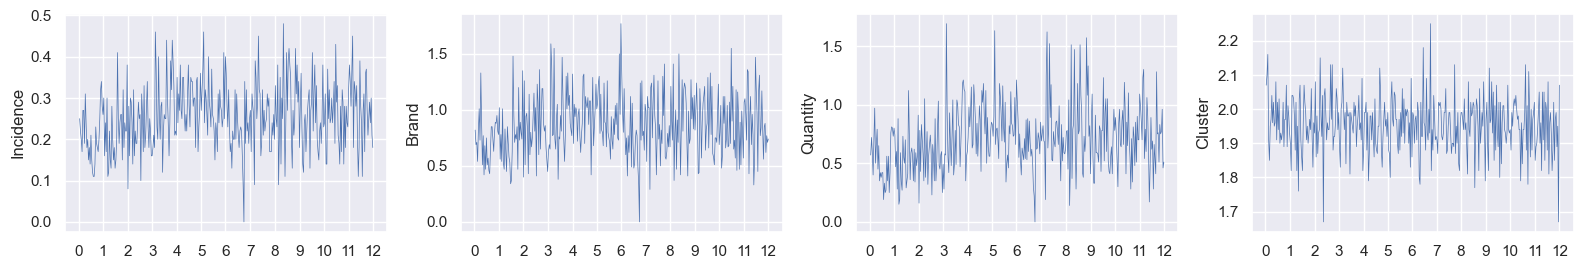

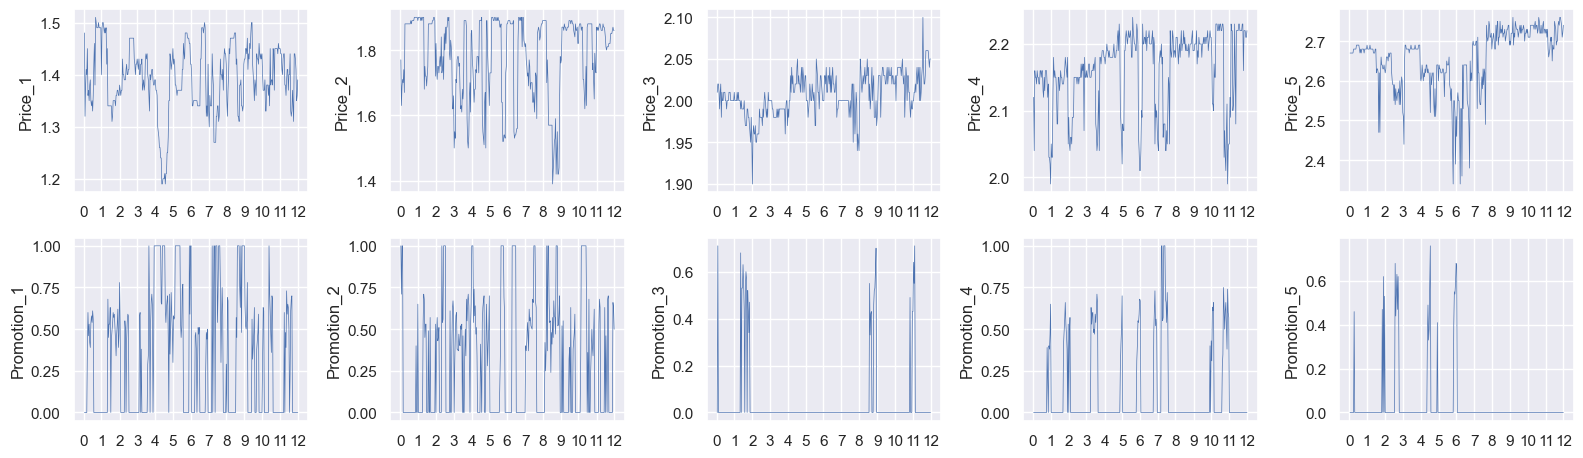

In [33]:
df_days_annual = df.copy()
df_days_annual.loc[df_days_annual['Day'] > 365, 'Day'] -= 365
df_days_annual = df_days_annual.groupby('Day').mean().drop(['ID','Customer_ID'], axis=1).round(2)

ticks = np.arange(0,366,365/12).round(0)

plt.figure(figsize=(16,3))
for i, col in enumerate(['Incidence','Brand','Quantity','Cluster']):
    plt.subplot(1,4,i+1)
    sns.lineplot(df_days_annual, x=df_days_annual.index, y=col, linewidth=0.5)
    plt.xticks(ticks, range(len(ticks)))
    plt.xlabel('')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

plt.figure(figsize=(16,5))
for i, col in enumerate(['Price_1','Price_2','Price_3','Price_4','Price_5','Promotion_1','Promotion_2','Promotion_3','Promotion_4','Promotion_5']):
    plt.subplot(2,5,i+1)
    sns.lineplot(df_days_annual, x=df_days_annual.index, y=col, linewidth=0.5)
    plt.xticks(ticks, range(len(ticks)))
    plt.xlabel('')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [34]:
df_eachday = pd.DataFrame()
for day in range(0,7):
    temp = pd.DataFrame(df[df['Day'] % 7 == day].sort_values('Day').mean()).T.drop(['ID','Customer_ID'], axis=1).round(2).copy()
    temp['Day'] = day+1
    df_eachday = pd.concat([df_eachday, temp], ignore_index=True)
df_eachday = df_eachday.set_index('Day')
df_eachday

,Cluster,Incidence,Quantity,Brand,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Revenue
Day,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.95,0.24,0.64,0.82,0.76,0.02,0.08,0.01,0.05,0.08,1.38,1.78,2.00,2.16,2.65,0.32,0.32,0.04,0.12,0.04,0.08,0.37,0.07,0.36,0.43,1.31
2,1.97,0.26,0.73,0.89,0.74,0.02,0.08,0.02,0.05,0.09,1.39,1.78,2.00,2.16,2.64,0.34,0.30,0.03,0.13,0.03,0.10,0.42,0.11,0.34,0.53,1.49
3,1.95,0.24,0.66,0.79,0.76,0.02,0.08,0.02,0.04,0.08,1.39,1.78,2.01,2.17,2.66,0.39,0.31,0.06,0.09,0.04,0.10,0.36,0.15,0.28,0.45,1.34
4,1.94,0.24,0.69,0.80,0.76,0.03,0.08,0.02,0.04,0.08,1.39,1.78,2.01,2.16,2.66,0.31,0.30,0.05,0.14,0.02,0.13,0.37,0.12,0.26,0.52,1.40
5,1.96,0.26,0.71,0.91,0.74,0.02,0.07,0.01,0.05,0.10,1.41,1.78,2.01,2.16,2.66,0.31,0.32,0.03,0.12,0.03,0.12,0.32,0.09,0.35,0.59,1.47
6,1.94,0.25,0.65,0.83,0.75,0.02,0.08,0.01,0.05,0.08,1.39,1.78,2.01,2.16,2.66,0.35,0.36,0.04,0.13,0.04,0.12,0.36,0.08,0.30,0.44,1.30
7,1.97,0.26,0.75,0.88,0.74,0.02,0.08,0.01,0.06,0.09,1.39,1.78,2.01,2.16,2.66,0.39,0.30,0.05,0.10,0.04,0.11,0.39,0.10,0.38,0.57,1.55


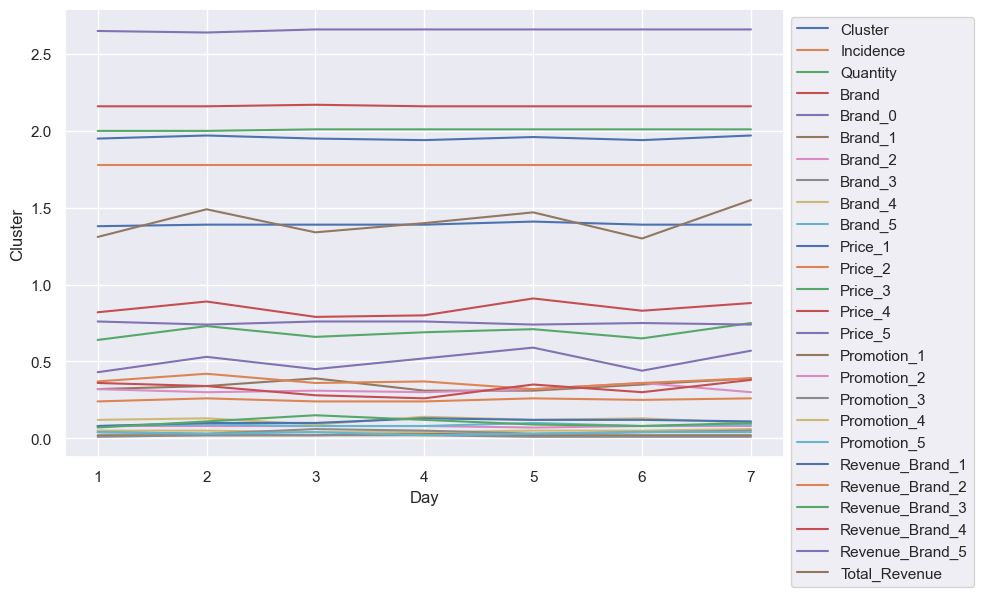

In [35]:
plt.figure(figsize=(10,6))
for col in df_eachday.columns:
    sns.lineplot(df_eachday, x=df_eachday.index, y=col, label=col)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Product analysis

In [36]:
df_byday_bpp = df_byday_sum[df_byday_sum.Incidence>1][['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']].merge(df_byday_mean[df_byday_sum.Incidence>1][['Price_1','Price_2','Price_3','Price_4','Price_5','Promotion_1','Promotion_2','Promotion_3','Promotion_4','Promotion_5']], left_index=True, right_index=True)

In [37]:
df_byday_bpp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
Day,,,,,,,,,,,,,,,
1,0,3,0,4,6,1.59,1.87,2.01,2.09,2.66,0.0,1.0,0.0,0.0,0.0
3,0,0,0,4,6,1.59,1.87,2.01,2.09,2.66,0.0,1.0,0.0,0.0,0.0
4,0,5,0,9,0,1.59,1.87,2.01,2.09,2.66,0.0,1.0,0.0,0.0,0.0
5,0,1,0,4,4,1.59,1.87,1.97,2.09,2.66,0.0,0.0,0.0,0.0,0.0
6,0,0,8,5,7,1.59,1.87,2.01,2.09,2.66,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0,10,5,0,3,1.51,1.82,2.09,2.24,2.80,0.0,0.0,0.0,0.0,0.0
724,0,8,0,2,3,1.51,1.82,2.09,2.24,2.80,0.0,0.0,0.0,0.0,0.0
725,1,11,1,5,5,1.51,1.82,2.09,2.24,2.80,0.0,0.0,0.0,0.0,0.0


,Price_1,Price_2,Price_3,Price_4,Price_5
Brand_1,-0.330374,0.046395,0.113201,0.109578,-0.008171
Brand_2,-0.017838,-0.394801,-0.015655,-0.018344,0.048385
Brand_3,0.031612,0.044292,0.049930,0.062492,0.042168
Brand_4,-0.022794,0.050299,-0.121464,-0.159314,-0.025938
Brand_5,-0.082010,0.040966,-0.144079,-0.114034,-0.202949


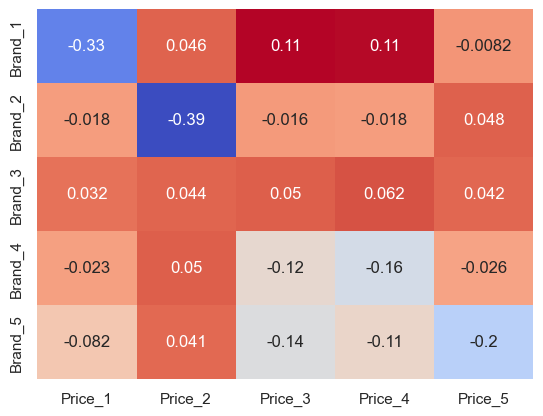

,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
Brand_1,0.080742,0.026029,-0.008199,-0.046463,-0.040352
Brand_2,0.120277,0.252766,0.100999,0.065877,-0.053942
Brand_3,0.023744,-0.047345,0.110616,0.019832,0.025945
Brand_4,0.082153,0.026881,-0.051514,0.107952,0.061488
Brand_5,0.106705,0.027133,-0.063171,0.062539,0.316673


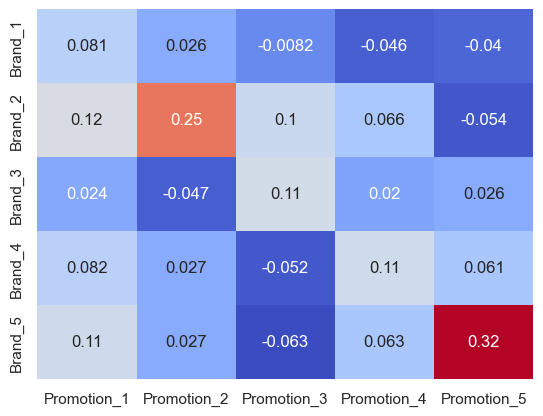

In [71]:
sales_cols = [f'Brand_{i}' for i in range(1, 6)]
price_cols = [f'Price_{i}' for i in range(1, 6)]
promotion_cols = [f'Promotion_{i}' for i in range(1, 6)]

correlation_matrix_price = df_byday_bpp[sales_cols + price_cols].corr()
display(correlation_matrix_price.loc[sales_cols, price_cols])
# plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix_price.loc[sales_cols, price_cols], annot=True, cmap='coolwarm', cbar=None)
plt.show()

correlation_matrix_price = df_byday_bpp[sales_cols + promotion_cols].corr()
display(correlation_matrix_price.loc[sales_cols, promotion_cols])
# plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix_price.loc[sales_cols, promotion_cols], annot=True, cmap='coolwarm', cbar=None)
plt.show()

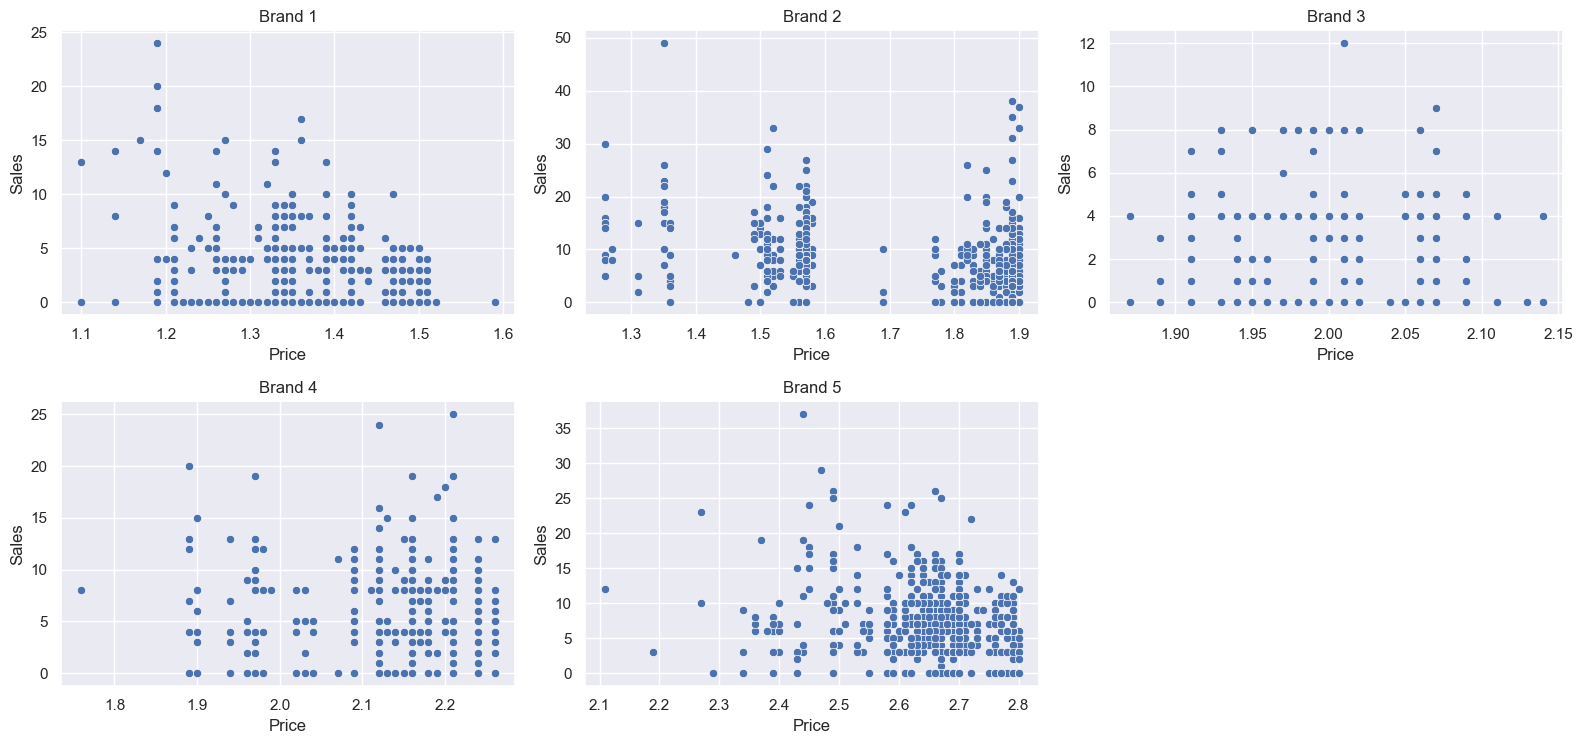

In [39]:
plt.figure(figsize=(16,8))
for i in range(1,6):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df_byday_bpp[f'Price_{i}'], y=df_byday_bpp[f'Brand_{i}'])
    plt.title(f'Brand {i}')
    plt.xlabel('Price')
    plt.ylabel('Sales')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()